In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\USUARIO\anaconda3\envs\IDSA37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Problema 1:
 
#### Seleccionar dataset generate_gaussians_distributions() y calcular accuracy

In [6]:
X, y = generate_gaussians_distributions() # Seleccionamos una Distribución Gaussiana

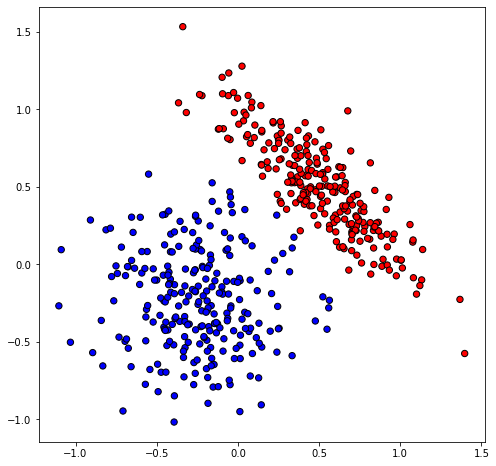

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [8]:
model = LogisticRegression(solver='lbfgs')

In [9]:
model.fit(X, y)

LogisticRegression()

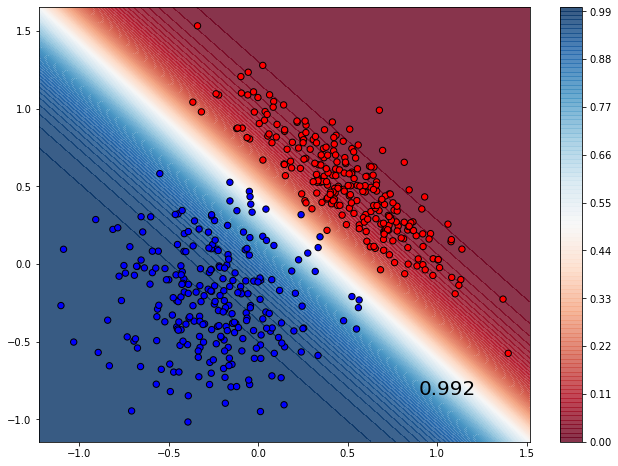

In [10]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [11]:
print(score)

0.992


#### El accuracy para Gaussians_Distributions es 0.992

# Regresión polinomial

In [12]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [13]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X,(X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X,(X[:,0]*X[:,1]).reshape(-1,1) , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X,(X[:,1]**2).reshape(-1,1) , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [14]:
add_columns(X).shape

(500, 6)

In [15]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [16]:
model_poly.fit(add_columns(X), y)

LogisticRegression(fit_intercept=False)

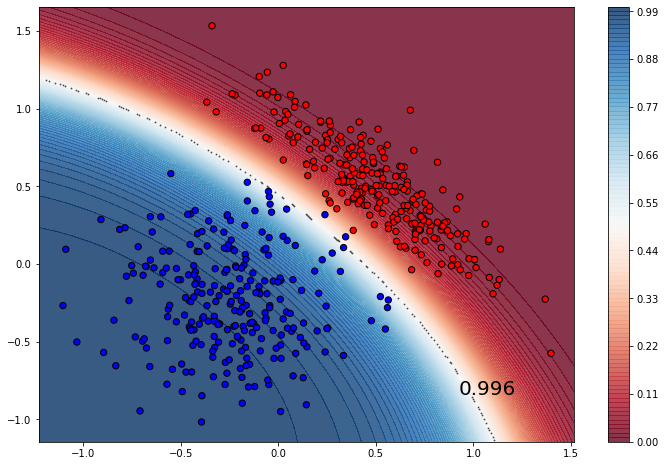

In [17]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

# Pregunta 5:

#### Indicar cuales de las siguientes afirmaciones son correctas:

#### La opción fit_intercept esta en False ya que le estoy pasando una columna de todos unos que hace las veces del bias (ordenada al origen)
#### El resultado de accuracy de la regresión logística teoricamente debería haber sido 1 para el dataset generate_elipse_data ya que una cuadrática puede fraccionar el plano con una elipse
#### El resultado de accuracy de la regresión logística teoricamente debería haber sido 1 para el dataset generate_gaussians_distributions (Sin agregar columnas) ya que es linealmente separable

Respuesta:
#### Todas estas afirmaciones son correctas

# Pregunta 6

#### Encuentre algún valor de C con el que se obtienen mejores accuracies

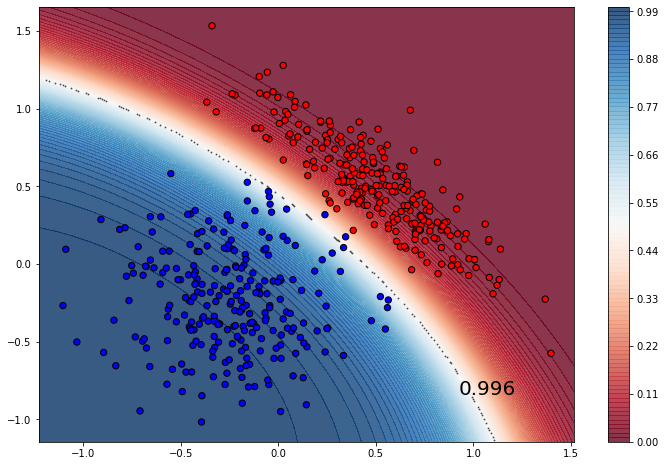

In [18]:
C = 1 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

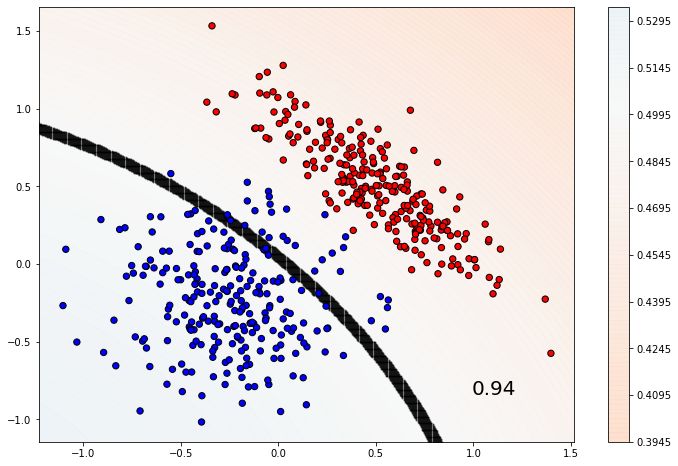

In [19]:
C = 0.001 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

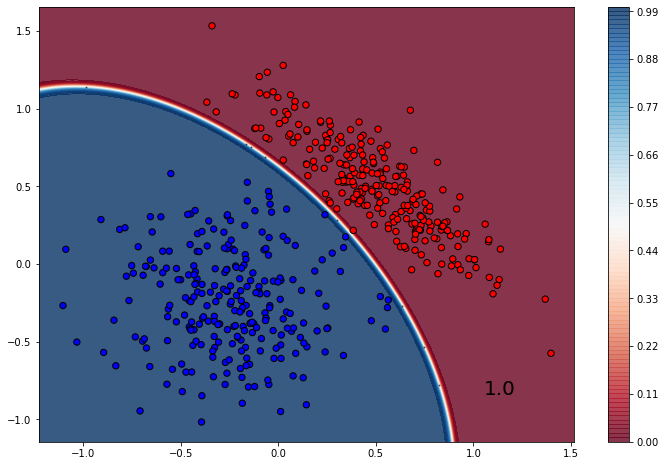

In [20]:
C = 100000 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

#### Para valores de C mayores a 100000 se logra un accuracy de 1 para ambos datasets